In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from pandas import DatetimeIndex
from wordcloud import WordCloud , STOPWORDS

%matplotlib inline
plt.style.use('default')

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')


In [288]:
columns = ['ID','Region','Territory','Pricing, Delivery_Terms_Quote_Appr','Pricing, Delivery_Terms_Approved',
'Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved','Submitted_for_Approval','Bureaucratic_Code',
          'Account_Created_Date','Billing_Country','Account_Name','Opportunity_Name','Opportunity_ID','Month'
           ,'Delivery_Quarter','Stage','Total_Amount_Currency'
          ,'Total_Amount','Total_Taxable_Amount_Currency','Total_Taxable_Amount'] 
df = pd.read_csv('Entrenamieto_ECI_2020.csv',usecols=columns)
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Account_Name,Opportunity_Name,Opportunity_ID,Month,Delivery_Quarter,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Account_Name_619,Opportunity_Name_12598,0,2016 - 5,Q2,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Account_Name_619,Opportunity_Name_12600,1,2016 - 1,Q1,EUR,"48,230.00",EUR,"48,230.00",Closed Won
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Account_Name_1794,Opportunity_Name_469,2,2016 - 1,Q1,USD,"83,865.60",USD,"83,865.60",Closed Won
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Account_Name_1201,Opportunity_Name_415,3,2018 - 2,Q1,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Account_Name_1201,Opportunity_Name_851,4,2018 - 2,Q1,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost


In [289]:
df.loc[df.Region == 'Japan', 'Territory'] = 'Japan'
df.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Account_Name,Opportunity_Name,Opportunity_ID,Month,Delivery_Quarter,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Account_Name_619,Opportunity_Name_12598,0,2016 - 5,Q2,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Account_Name_619,Opportunity_Name_12600,1,2016 - 1,Q1,EUR,"48,230.00",EUR,"48,230.00",Closed Won
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Account_Name_1794,Opportunity_Name_469,2,2016 - 1,Q1,USD,"83,865.60",USD,"83,865.60",Closed Won
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Account_Name_1201,Opportunity_Name_415,3,2018 - 2,Q1,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Account_Name_1201,Opportunity_Name_851,4,2018 - 2,Q1,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Account_Name_1201,Opportunity_Name_939,5,2018 - 2,Q1,USD,"14,838,277.50",USD,"14,838,277.50",Closed Lost
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Account_Name_1201,Opportunity_Name_1618,6,2017 - 2,Q1,USD,"2,659,494.60",USD,"2,659,494.60",Closed Lost
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,Account_Name_1794,Opportunity_Name_8227,7,2016 - 1,Q1,USD,"50,688.00",USD,"50,688.00",Closed Won
8,24353,Japan,Japan,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Account_Name_1888,Opportunity_Name_6151,8,2016 - 2,Q1,JPY,"15,600.00",JPY,"470,400.00",Closed Lost
9,24355,Japan,Japan,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,Account_Name_1888,Opportunity_Name_6151,8,2016 - 2,Q1,JPY,"4,400.00",JPY,"470,400.00",Closed Lost


In [290]:
df[['Year','Month_B']] = df.Month.str.split("-",expand=True)
df.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Opportunity_ID,Month,Delivery_Quarter,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Year,Month_B
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,0,2016 - 5,Q2,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,2016,5
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,1,2016 - 1,Q1,EUR,"48,230.00",EUR,"48,230.00",Closed Won,2016,1
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,2,2016 - 1,Q1,USD,"83,865.60",USD,"83,865.60",Closed Won,2016,1
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,3,2018 - 2,Q1,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,2018,2
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,4,2018 - 2,Q1,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,2018,2
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,5,2018 - 2,Q1,USD,"14,838,277.50",USD,"14,838,277.50",Closed Lost,2018,2
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,6,2017 - 2,Q1,USD,"2,659,494.60",USD,"2,659,494.60",Closed Lost,2017,2
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,7,2016 - 1,Q1,USD,"50,688.00",USD,"50,688.00",Closed Won,2016,1
8,24353,Japan,Japan,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,8,2016 - 2,Q1,JPY,"15,600.00",JPY,"470,400.00",Closed Lost,2016,2
9,24355,Japan,Japan,1,0,0,0,0,Bureaucratic_Code_5,4/20/2015,...,8,2016 - 2,Q1,JPY,"4,400.00",JPY,"470,400.00",Closed Lost,2016,2


In [291]:
df['Month_B'] = pd.to_numeric(df['Month_B'])
df['Year'] = pd.to_numeric(df['Year'])

In [292]:
data = df.groupby(['Year']).agg({'Opportunity_ID':'count'})
data

,Opportunity_ID
Year,
2016,4371
2017,6318
2018,5830
2019,414
2020,14


In [293]:
print(df.shape)

(16947, 23)


In [294]:
df['Bureaucratic_Code_0_Approved'].value_counts()

0    11543
1     5404
Name: Bureaucratic_Code_0_Approved, dtype: int64

In [295]:
df['Bureaucratic_Code_0_Approval'].value_counts()

0    8889
1    8058
Name: Bureaucratic_Code_0_Approval, dtype: int64

In [296]:
df['Stage'].replace({"Closed Lost": 0, "Closed Won": 1, 'Proposal': 1, 'Negotiation':1,'Qualification':1}, inplace=True)
new = df[['Region','Territory','Pricing, Delivery_Terms_Quote_Appr','Pricing, Delivery_Terms_Approved','Opportunity_ID','Stage']]
df['Stage'] = pd.to_numeric(df['Stage'])
#new.loc[df.Stage == 'Close Lost', 'Stage'] = 0
#new.loc[df.Stage == 'Close Won', 'Stage'] = 1
new.head(10)

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Opportunity_ID,Stage
0,EMEA,None,1,1,0,0
1,EMEA,None,0,0,1,1
2,Americas,NW America,0,0,2,1
3,Americas,NW America,1,0,3,0
4,Americas,NW America,1,0,4,0
5,Americas,NW America,1,0,5,0
6,Americas,NW America,1,0,6,0
7,Americas,NW America,1,1,7,1
8,Japan,Japan,1,0,8,0
9,Japan,Japan,1,0,8,0


In [297]:
df['Total_Amount_Currency'].value_counts()


USD    7361
JPY    4522
EUR    4503
AUD     556
GBP       5
Name: Total_Amount_Currency, dtype: int64

Text(0, 0.5, 'Monedas')

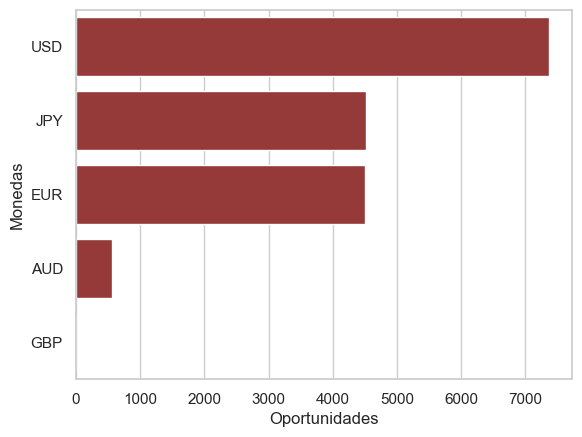

In [298]:
data = df['Total_Amount_Currency'].value_counts()
g = sns.barplot(x=data.values, y=data.index, orient='h', color='brown')
g.set_title("", fontsize=15)
g.set_xlabel("Oportunidades", fontsize=12)
g.set_ylabel("Monedas", fontsize=12)

In [302]:
buro = df.groupby(['Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved','Stage']).agg({'Stage':'count'})
buro

Stage
Bureaucratic_Code_0_Approval Bureaucratic_Code_0_Approved Stage       
0                            0                            0       2961
                                                          1       5928
1                            0                            0       1846
                                                          1        808
                             1                            0       2543
                                                          1       2861

In [260]:
group_m = df.sort_values(['Month_B'],ascending=True).\
        groupby(['Year','Month_B']).agg({'Opportunity_ID':'count'})
group_m

Opportunity_ID
Year Month_B                
2016 1                   196
     2                   440
     3                   628
     4                   383
     5                   341
     6                   352
     7                   306
     8                   313
     9                   380
     10                  359
     11                  381
     12                  292
2017 1                   444
     2                   392
     3                   487
     4                   475
     5                   586
     6                   643
     7                   625
     8                   513
     9                   491
     10                  638
     11                  450
     12                  574
2018 1                   466
     2                   498
     3                   467
     4                   579
     5                   461
     6                   542
     7                   536
     8                   440
     9                   406
     10                  666
     11                  459
     12                  310
2019 1                   186
     2                    58
     3                    46
     4                    44
     5                     8
     6                    25
     7                    25
     8                     5
     9                     2
     10                   13
     11                    1
     12                    1
2020 1                     7
     3                     2
     4                     3
     6                     1
     9                     1

In [261]:
df['Month_B'].value_counts()

10    1676
3     1630
6     1563
7     1492
4     1484
5     1396
2     1388
1     1299
11    1291
9     1280
8     1271
12    1177
Name: Month_B, dtype: int64

Text(47.25, 0.5, 'Año')

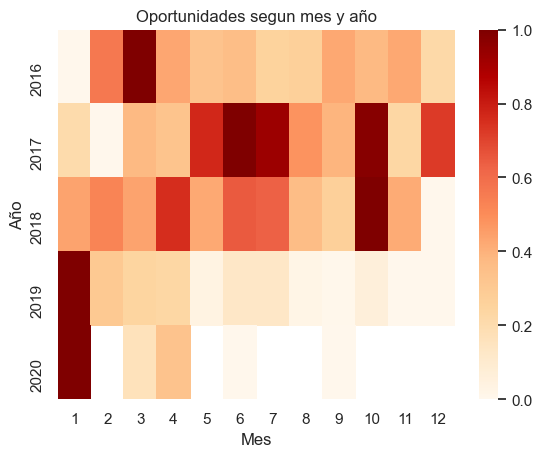

In [262]:

data = df.pivot_table(index='Month_B',columns='Year', values='Opportunity_ID', aggfunc='count')
data = ((data-data.min()) / (data.max() - data.min()))

visu = sns.heatmap(data.T,  cmap="OrRd")
visu.set_title("Oportunidades segun mes y año")
visu.set_xlabel("Mes")
visu.set_ylabel("Año")


In [263]:
df.drop_duplicates(subset=['Opportunity_ID'], keep='last',inplace=True)
for_heatmap = df.pivot_table(index='Year',columns='Month_B', values='Opportunity_ID', aggfunc='count')
#for_heatmap.sort_values(by=['Month_B'],inplace=True)
for_heatmap

Month_B,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2016,131.00,170.00,209.00,188.00,167.00,181.00,167.00,173.00,239.00,232.00,238.00,202.00
2017,308.00,237.00,310.00,294.00,343.00,414.00,410.00,332.00,287.00,363.00,283.00,309.00
2018,280.00,278.00,263.00,284.00,244.00,296.00,309.00,271.00,238.00,409.00,307.00,203.00
2019,127.00,35.00,25.00,27.00,5.00,14.00,10.00,5.00,2.00,8.00,1.00,1.00
2020,6.00,nan,1.00,3.00,nan,1.00,nan,nan,1.00,nan,nan,nan


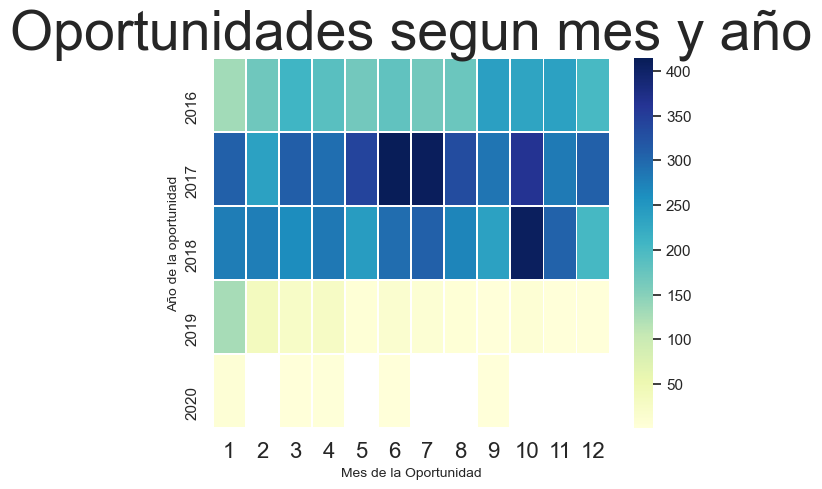

In [264]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Oportunidades segun mes y año", fontsize=40)
g.set_xlabel("Mes de la Oportunidad",fontsize=10)
g.set_ylabel("Año de la oportunidad", fontsize=10)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16)
plt.savefig('oportunidades_año_mes-heatmap.png')

In [265]:
territorios = df.groupby(['Territory']).size().nlargest(20)
territorios

Territory
Japan             1906
Germany           1080
NW America         878
India              680
Australia          579
None               568
NE America         518
France             393
Netherlands        384
SE America         340
Singapore          293
United Kingdom     228
Italy              208
Belgium            179
Spain              160
Thailand           147
Central US         145
Indonesia          141
SW America         104
Jordan              82
dtype: int64

In [266]:
location_counts = df['Territory'].value_counts(dropna=True)
territorios = {
    'Germany','NW America','Australia','India','NE America','Netherlands','SE America','France','Singapore'
    ,'United Kingdom','Belgium','Italy','Spain','Central US','China (PRC)','SW America','Thailand','Indonesia'
}

#territorios = df.groupby(['Territory']).size().nlargest(20)
terri = [x for x in location_counts.index.tolist() if x in territorios]
country_df = pd.DataFrame()
for c in terri:
    country_df[c] = pd.Series(dtype=object)
country_df = country_df.transpose()
country_df.loc[:, 'Wons'] = country_df.index.map(lambda x: df[(df['Territory'] == x)]['Stage'].sum())
country_df.loc[:, 'Losts'] = country_df.index.map(lambda x: df[(df['Territory'] == x)]['Stage'].apply(lambda y: 1 - y).sum())

#op = new.groupby(['Opportunity_ID']).size().nlargest(15)

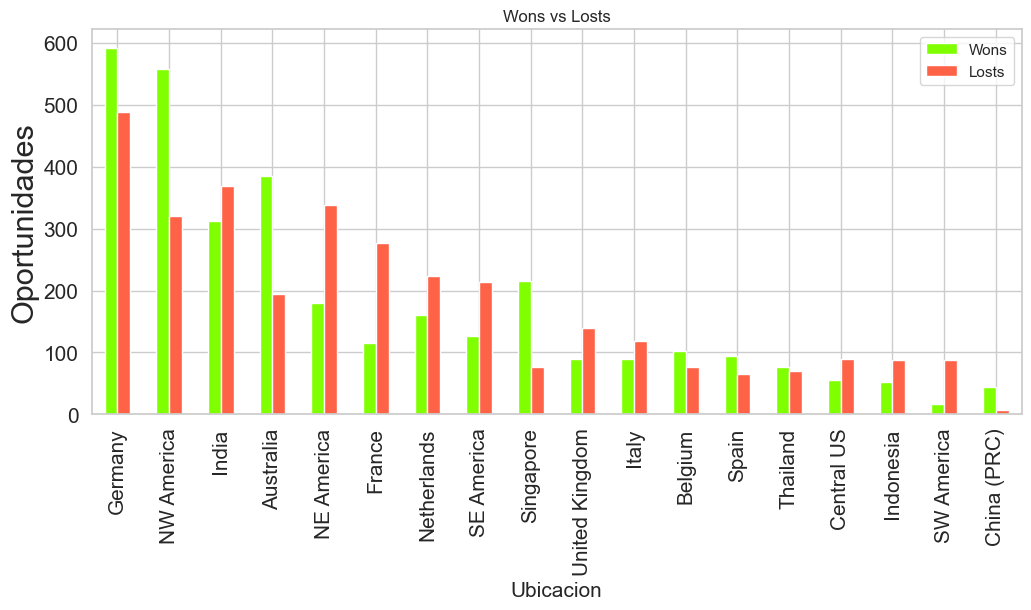

In [267]:
ax = country_df.plot.bar(color=["chartreuse","tomato"], figsize=(12,5), title="Wons vs Losts",fontsize=15)
ax.set_xlabel("Ubicacion",fontsize=15)
ax.set_ylabel("Oportunidades",fontsize=22)
fig = ax.get_figure()


fig.savefig('territorios_won_vs_lost.png')

plt.show()

In [268]:
regiones = df['Region'].value_counts(dropna=True)
group_region = df.groupby(['Region','Stage']).agg({'Stage':'count'})
group_region

Stage
Region      Stage       
APAC        0        924
            1       1162
Americas    0       1358
            1       1101
EMEA        0       1737
            1       1504
Japan       0        595
            1       1311
Middle East 0        105
            1         44

In [269]:
regiones = df['Region'].value_counts(dropna=True)
regions = {
    'EMEA','Japan','Americas','APAC','Middle East'
}

#territorios = df.groupby(['Territory']).size().nlargest(20)
regiones_op = [x for x in regiones.index.tolist() if x in regions]
data = pd.DataFrame()
for c in regiones_op:
    data[c] = pd.Series(dtype=object)
data = data.transpose()
data.loc[:, 'Wons'] = data.index.map(lambda x: df[(df['Region'] == x)]['Stage'].sum())
data.loc[:, 'Losts'] = data.index.map(lambda x: df[(df['Region'] == x)]['Stage'].apply(lambda y: 1 - y).sum())


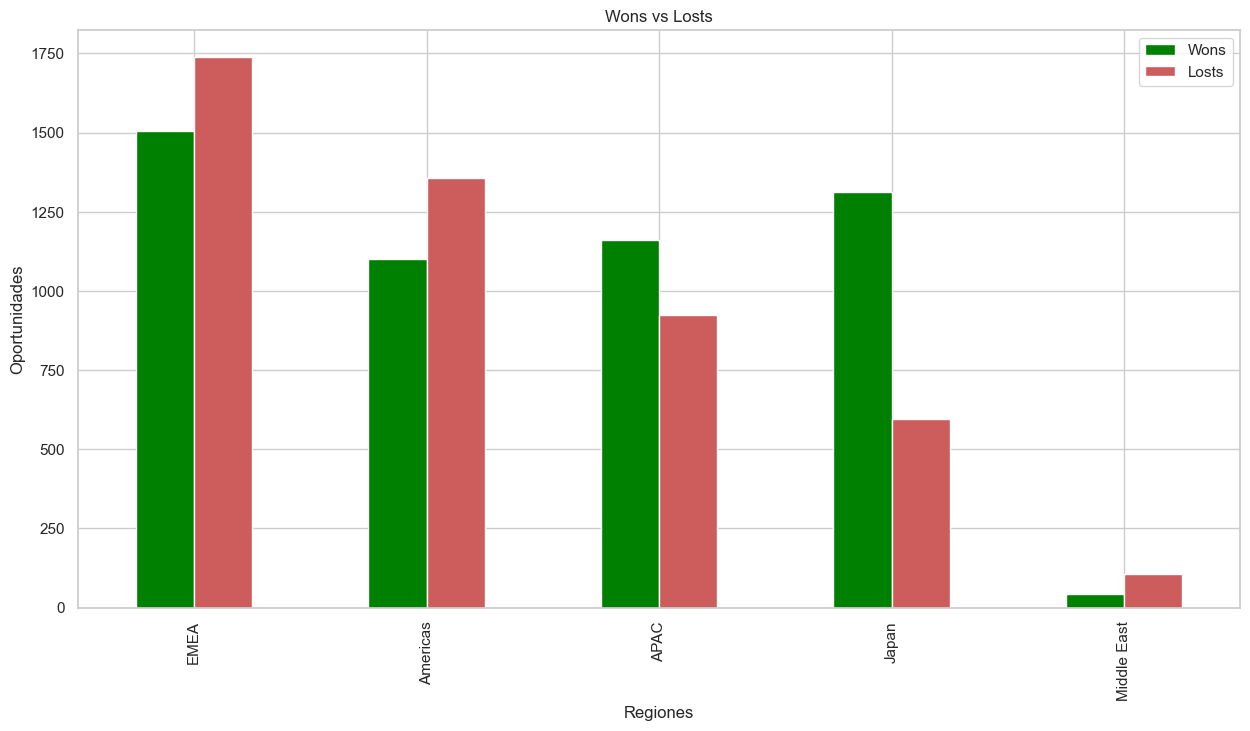

In [270]:
new = data.plot.bar(color=["Green","IndianRed"], figsize=(15,7.5), title="Wons vs Losts")
new.set_xlabel("Regiones")
new.set_ylabel("Oportunidades")
fig = new.get_figure()
fig.savefig('regiones_oportunidades_won_vs_lost.png')

#plt.show()
#plt.savefig('regiones_oportunidades_won_vs_lost.png')

In [271]:
group = df.groupby(['Bureaucratic_Code','Stage']).agg({'Stage':['count']})
group

Stage
                          count
Bureaucratic_Code   Stage      
Bureaucratic_Code_0 1        11
Bureaucratic_Code_1 0       119
                    1        58
Bureaucratic_Code_2 0        86
                    1        34
Bureaucratic_Code_3 0         1
                    1         1
Bureaucratic_Code_4 0      2992
                    1      4440
Bureaucratic_Code_5 0      1521
                    1       577
Bureaucratic_Code_6 1         1

In [272]:
df['Bureaucratic_Code_0_Approval'].value_counts()

1    4933
0    4908
Name: Bureaucratic_Code_0_Approval, dtype: int64

In [273]:
df['Bureaucratic_Code_0_Approved'].value_counts()

0    6504
1    3337
Name: Bureaucratic_Code_0_Approved, dtype: int64

In [274]:
aprobados = df.loc[df['Stage'] == 1]['Bureaucratic_Code'].value_counts.head()
print("Aprobados") ; display(aprobados)

AttributeError: 'function' object has no attribute 'head'

In [275]:
burocraticos = df.loc[df['Bureaucratic_Code','Stage']]
burocraticos.head()

KeyError: ('Bureaucratic_Code', 'Stage')

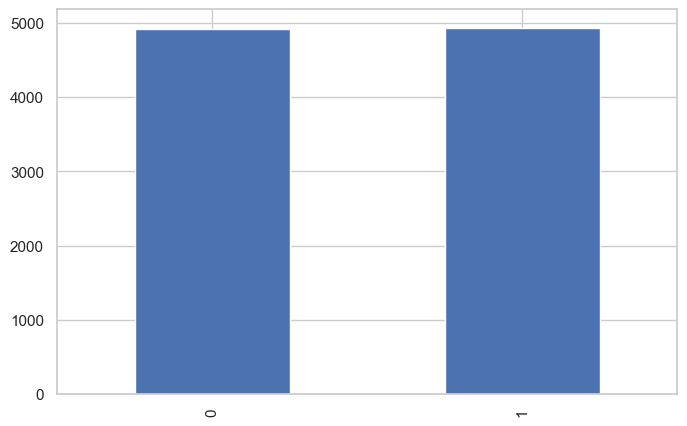

In [276]:
df['Bureaucratic_Code_0_Approval'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

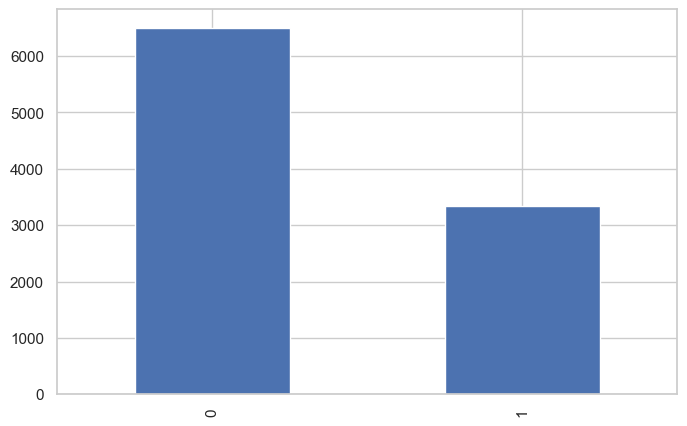

In [277]:
df['Bureaucratic_Code_0_Approved'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

Qué son los codigos burocraticos, por qué las oportunidades estan representadas como codigos burocraticos?
Se tienen 6 tipos de codigos burocraticos, donde el que predomina es el codigo burocratico 4. Que significa el codigo burocratico 4? Se presta mayor atencion al codigo burocratico 4, para ver si existe algun patron. Como es la relacion entre el codigo burocratico 4 y el stage.

In [278]:
df['Bureaucratic_Code'].value_counts()

Bureaucratic_Code_4    7432
Bureaucratic_Code_5    2098
Bureaucratic_Code_1     177
Bureaucratic_Code_2     120
Bureaucratic_Code_0      11
Bureaucratic_Code_3       2
Bureaucratic_Code_6       1
Name: Bureaucratic_Code, dtype: int64

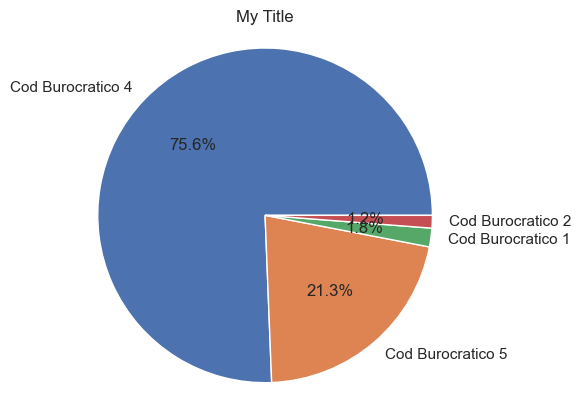

In [279]:
data = df['Bureaucratic_Code'].value_counts().nlargest(4)
#my_labels = 'Cod Burocratico 4','Cod Burocratico 5','Cod Burocratico 1','Cod Burocratico 2', 'Cod Burocratico 0',
#'Cod Burocratico 3','Cod Burocratico 6'
my_labels = 'Cod Burocratico 4','Cod Burocratico 5','Cod Burocratico 1','Cod Burocratico 2'
plt.pie(data, labels=my_labels,autopct='%1.1f%%')
plt.title('My Title')
plt.axis('equal')
plt.show()

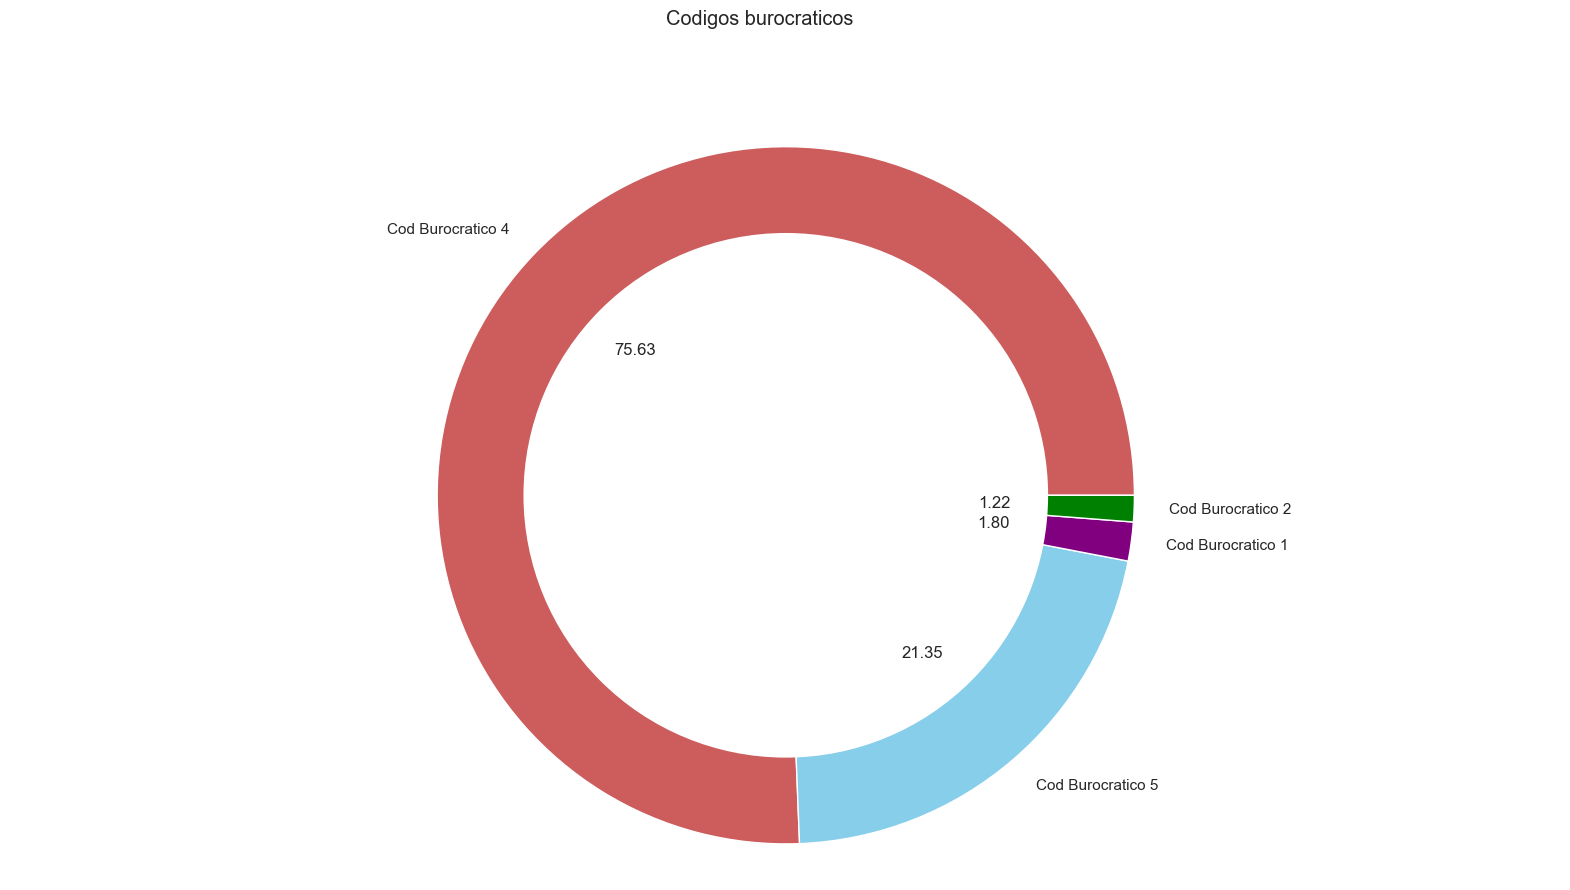

In [280]:
data = df['Bureaucratic_Code'].value_counts().nlargest(4)
my_labels = 'Cod Burocratico 4','Cod Burocratico 5','Cod Burocratico 1','Cod Burocratico 2'
plt.figure(figsize=(15, 7.5))
plt.pie(data,colors=['IndianRed', 'SkyBlue','purple','green'], labels=my_labels, autopct='%.2f')

centre_circle = plt.Circle((0,0),0.75,color='white', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(20,10)
fig.suptitle('Codigos burocraticos')

plt.axis('equal')
plt.show()

In [281]:
burocratics_counts = df['Bureaucratic_Code'].value_counts(dropna=True)
codigos = {
    'Bureaucratic_Code_4','Bureaucratic_Code_5','Bureaucratic_Code_1','Bureaucratic_Code_2'
}

cod = [x for x in burocratics_counts.index.tolist() if x in codigos]
codigos_df = pd.DataFrame()
for c in cod:
    codigos_df[c] = pd.Series(dtype=object)
codigos_df = codigos_df.transpose()
codigos_df.loc[:, 'Wons'] = codigos_df.index.map(lambda x: df[(df['Bureaucratic_Code'] == x)]['Stage'].sum())
codigos_df.loc[:, 'Losts'] = codigos_df.index.map(lambda x: df[(df['Bureaucratic_Code'] == x)]['Stage'].apply(lambda y: 1 - y).sum())


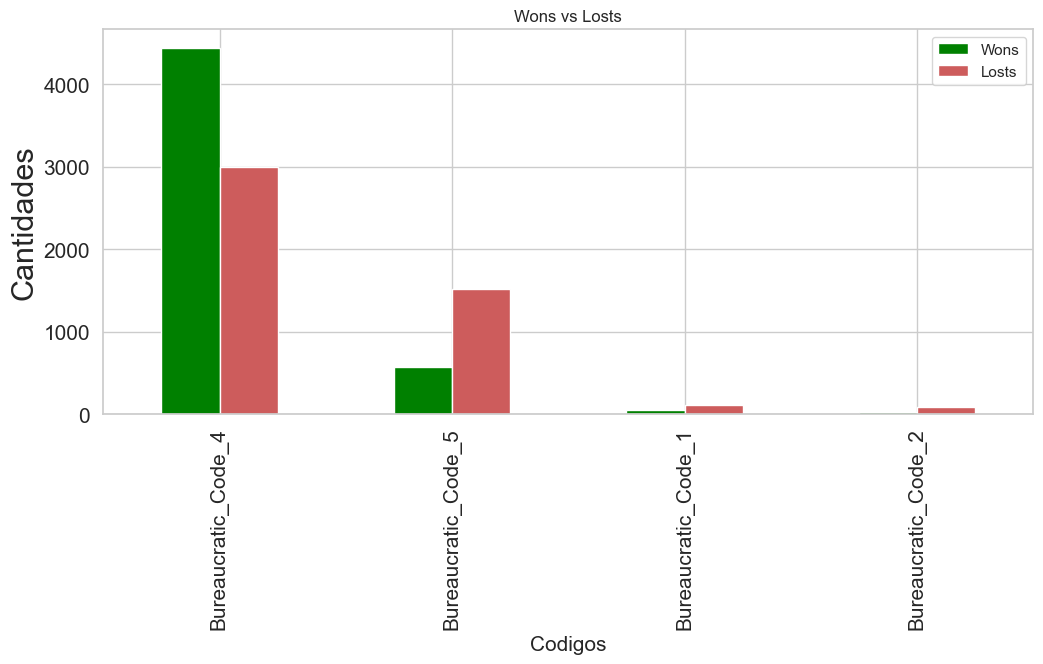

In [282]:
ax = codigos_df.plot.bar(color=["green","IndianRed"], figsize=(12,5), title="Wons vs Losts",fontsize=15)
ax.set_xlabel("Codigos",fontsize=15)
ax.set_ylabel("Cantidades",fontsize=22)
fig = ax.get_figure()

#fig.autolayout : True
#fig.savefig('territorios_won_vs_lost.png')

plt.show()

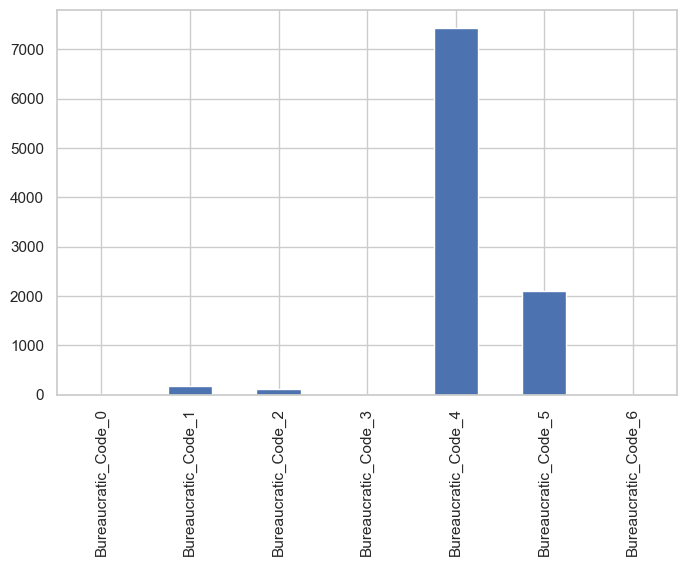

In [283]:
df['Bureaucratic_Code'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))

In [284]:
df['Bureaucratic_Code_0_Approval'].value_counts()

1    4933
0    4908
Name: Bureaucratic_Code_0_Approval, dtype: int64

In [285]:
buro = df.groupby(['Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved','Stage']).agg({'Stage':'count'})
buro

Stage
Bureaucratic_Code_0_Approval Bureaucratic_Code_0_Approved Stage       
0                            0                            0       1836
                                                          1       3072
1                            0                            0       1189
                                                          1        407
                             1                            0       1694
                                                          1       1643

In [219]:
buro = df.groupby(['Bureaucratic_Code_0_Approved','Stage']).agg({'Stage':'count'})
buro

Stage
Bureaucratic_Code_0_Approved Stage       
0                            0       3025
                             1       3479
1                            0       1694
                             1       1643

In [213]:
buro = df.groupby(['Bureaucratic_Code_0_Approval','Stage']).agg({'Stage':'count'})
buro

Stage
Bureaucratic_Code_0_Approval Stage       
0                            0       1836
                             1       3072
1                            0       2883
                             1       2050

In [77]:
new['Stage'].value_counts()

1    9597
0    7350
Name: Stage, dtype: int64

In [ ]:
groups_by_closes_won['Stage'].plot(kind='bar',figsize=(16,8),rot=85,title=\
        'Won a partir de op ID',color='Seagreen');
groups_by_closes_lost['Stage'].plot(kind='bar',figsize=(16,8),\
        bottom=groups_by_closes_won['Stage'],rot=85,color='Indianred');
ax=plt.gca()
ax.set_ylabel('Ocurrencias')
ax.set_xlabel('Caracteres de la keyword');
ax.legend(labels=['Won', 'Lost'])

In [228]:
op = new.groupby(['Region','Total_Amount_Currency']).agg({'Total_Amount_Currency':'sum'})
op
#grouped=oscars_short.groupby(['award']).agg({'age_at_award':['mean','count']}) 


KeyError: 'Region'

In [63]:
op = new.groupby(['Opportunity_ID']).size().nlargest(15)
op


Opportunity_ID
2008     36
12460    36
5123     26
6606     26
2911     24
767      18
4568     16
6652     16
6653     16
6654     16
7568     16
8698     16
2653     14
6569     14
7565     14
dtype: int64

In [51]:
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [25]:
df["Account_Created_Date"] = pd.to_datetime(df["Account_Created_Date"], format='%m/%d/%Y')
df['Account_Created_Year'] = DatetimeIndex(df["Account_Created_Date"]).year
df.head(10)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Account_Created_Year
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,Netherlands,Account_Name_619,Opportunity_Name_12598,0,EUR,5272800.0,EUR,5272800.0,Closed Lost,2015
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,Netherlands,Account_Name_619,Opportunity_Name_12600,1,EUR,48230.0,EUR,48230.0,Closed Won,2015
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,United States,Account_Name_1794,Opportunity_Name_469,2,USD,83865.6,USD,83865.6,Closed Won,2015
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,United States,Account_Name_1201,Opportunity_Name_415,3,USD,7421881.5,USD,7421881.5,Closed Lost,2013
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,United States,Account_Name_1201,Opportunity_Name_851,4,USD,13357192.5,USD,13357192.5,Closed Lost,2013
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,United States,Account_Name_1201,Opportunity_Name_939,5,USD,14838277.5,USD,14838277.5,Closed Lost,2013
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,United States,Account_Name_1201,Opportunity_Name_1618,6,USD,2659494.6,USD,2659494.6,Closed Lost,2013
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,2015-04-21,United States,Account_Name_1794,Opportunity_Name_8227,7,USD,50688.0,USD,50688.0,Closed Won,2015
8,24353,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,Japan,Account_Name_1888,Opportunity_Name_6151,8,JPY,15600.0,JPY,470400.0,Closed Lost,2015
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,Japan,Account_Name_1888,Opportunity_Name_6151,8,JPY,4400.0,JPY,470400.0,Closed Lost,2015


In [139]:
new_region = df.groupby(['Region']).agg({'Opportunity_ID':'count','Opportunity_Name':'count'})
new_region

,Opportunity_ID,Opportunity_Name
Region,,
APAC,3262,3262
Americas,3945,3945
EMEA,4664,4664
Japan,4892,4892
Middle East,184,184


In [142]:
df['Billing_Country'].value_counts().nlargest(20)

Japan             4879
United States     3802
Germany           1979
Australia         1169
India              672
Netherlands        563
Singapore          432
France             396
Spain              317
Italy              295
United Kingdom     284
Belgium            226
China              222
Thailand           195
Austria            145
Indonesia          142
Philippines        138
Luxembourg         136
Canada             120
Jordan             106
Name: Billing_Country, dtype: int64

In [140]:
new_terr = df.groupby(['Territory']).agg({'Opportunity_ID':'count','Opportunity_Name':'count'})
new_terr

,Opportunity_ID,Opportunity_Name
Territory,,
Albania,2,2
Armenia,2,2
Australia,1208,1208
Austria,145,145
Belarus,4,4
...,...,...
UAE (Dubai),31,31
UAE (Others),2,2
Ukraine,5,5


In [45]:
df['Total_Amount_Currency'].value_counts()

USD    7361
JPY    4522
EUR    4503
AUD     556
GBP       5
Name: Total_Amount_Currency, dtype: int64

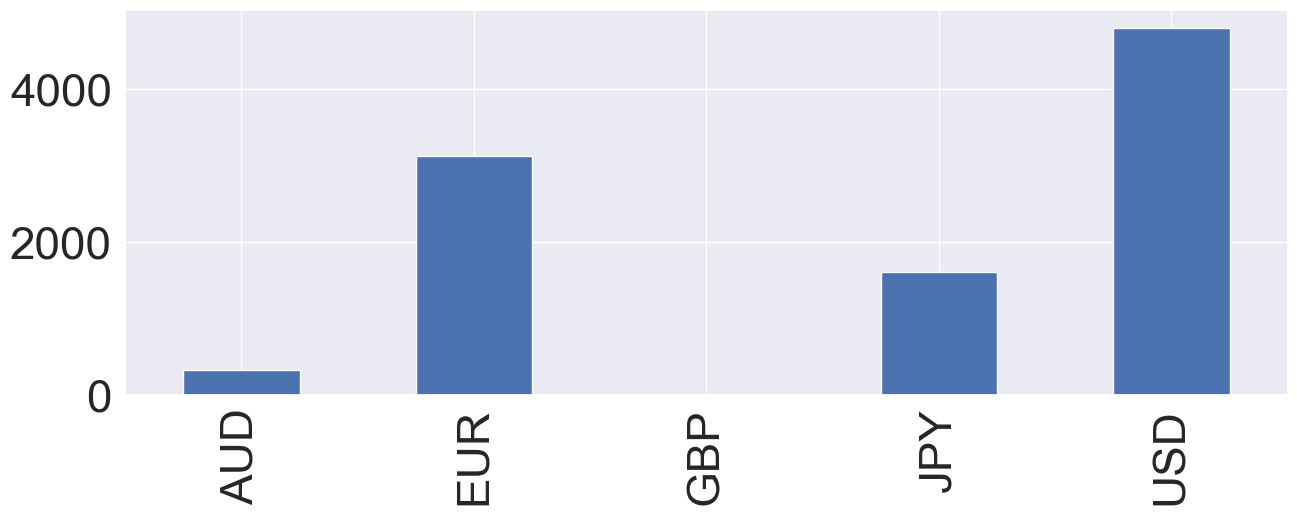

In [236]:
df['Total_Amount_Currency'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))

Text(0.5, 1.0, 'Oportunidades segun la moneda')

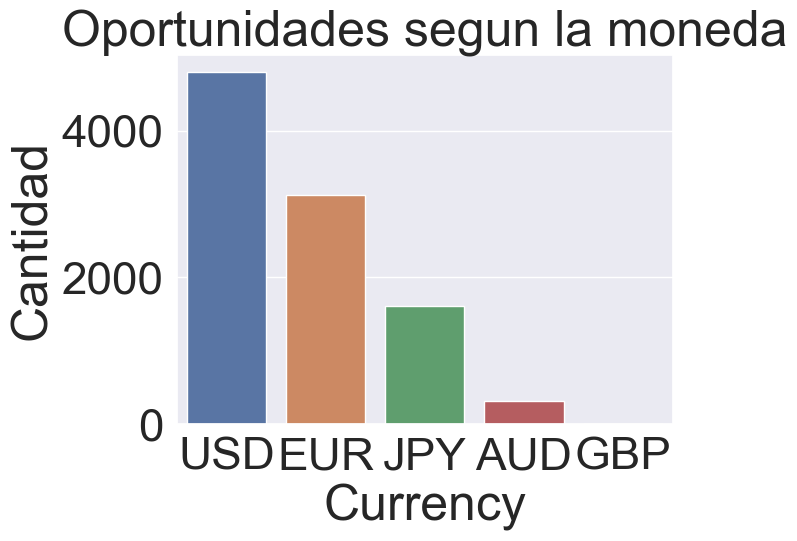

In [231]:
order = df['Total_Amount_Currency'].value_counts().index
visu = sns.countplot(df['Total_Amount_Currency'].dropna(), order=order)
visu.set(xlabel='Currency', ylabel='Cantidad')
visu.axes.set_title('Oportunidades segun la moneda')

In [196]:
df_mas_plata = df.groupby(['Region']).agg({'Total_Taxable_Amount':'sum'})
#df_mas_plata['Total_Taxable_Amount'].apply(lambda x: x/1000)
#print(df_mas_plata)


#df.plot()
#plt.xticks(rotation=45)
#plt.show()

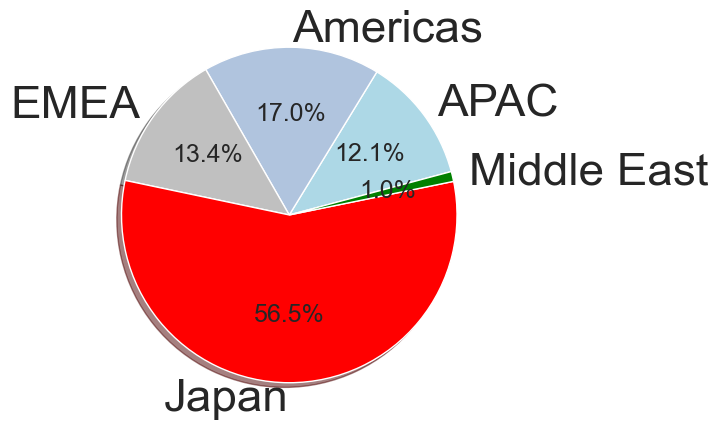

In [197]:
my_labels = df_mas_plata.index
my_colors = ['lightblue','lightsteelblue','silver','red','green']
#my_explode = (0, 0.1, 0)
plt.pie(df_mas_plata['Total_Taxable_Amount'], labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors)

plt.axis('equal')
plt.show()

In [46]:
df['Total_Taxable_Amount_Currency'].value_counts()

USD    7347
JPY    4525
EUR    4518
AUD     553
GBP       4
Name: Total_Taxable_Amount_Currency, dtype: int64

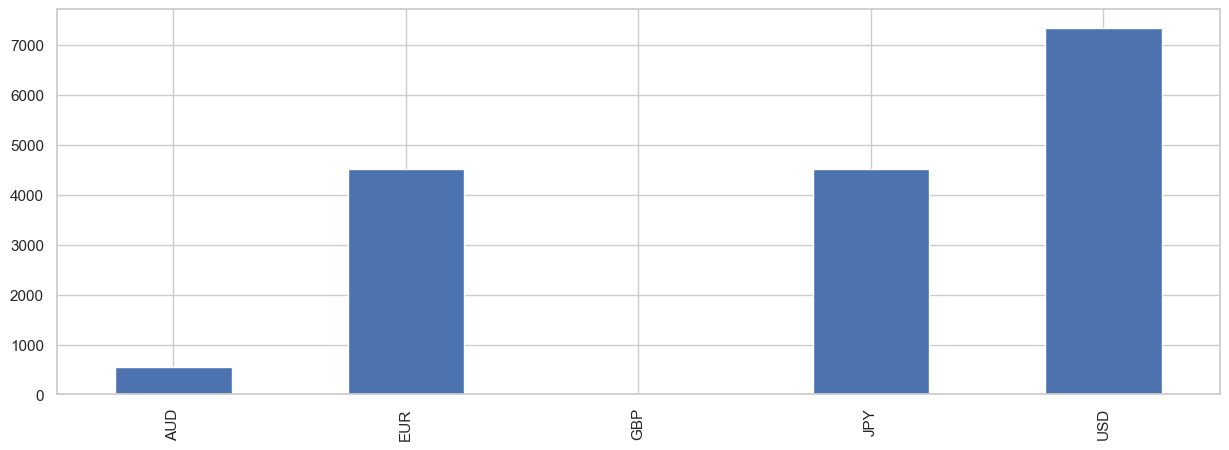

In [48]:
df['Total_Taxable_Amount_Currency'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))

In [40]:
closes = df.groupby('Stage')
print(closes)

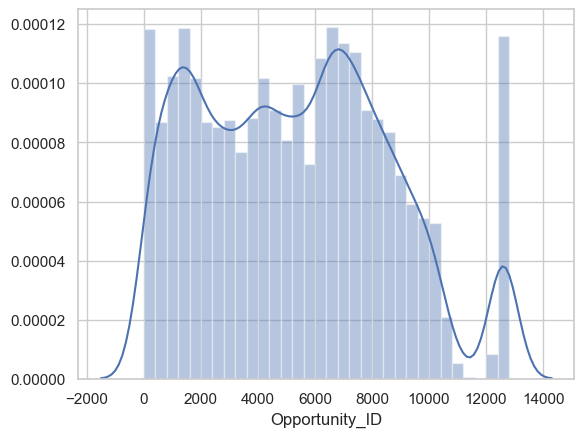

In [42]:
sns.distplot(df['Opportunity_ID'])

In [3]:
df['Submitted_for_Approval'].value_counts()

0    16947
Name: Submitted_for_Approval, dtype: int64

In [14]:
df['Opportunity_ID'].value_counts()

12460    36
2008     36
5123     26
6606     26
2911     24
         ..
7482      1
5435      1
3400      1
7498      1
0         1
Name: Opportunity_ID, Length: 9841, dtype: int64

In [4]:
df['Actual_Delivery_Date'].value_counts()

NaT    16947
Name: Actual_Delivery_Date, dtype: int64

In [5]:
df['Prod_Category_A'].value_counts()

Prod_Category_A_None    16947
Name: Prod_Category_A, dtype: int64

Estas 3 columnas de arriba no presentan informacion relevante. Tienen en toda sus columnas los mismos valores.

In [6]:
df['Bureaucratic_Code'].value_counts()

Bureaucratic_Code_4    12587
Bureaucratic_Code_5     3803
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

In [7]:
print('Cantidad de usuarios: {}'.format(df['ID'].nunique()))

Cantidad de usuarios: 16947


In [28]:
df.isnull().any()

ID                                    False
Region                                False
Territory                             False
Pricing, Delivery_Terms_Quote_Appr    False
Pricing, Delivery_Terms_Approved      False
Bureaucratic_Code_0_Approval          False
Bureaucratic_Code_0_Approved          False
Submitted_for_Approval                False
Bureaucratic_Code                     False
Account_Created_Date                  False
Billing_Country                       False
Account_Name                          False
Opportunity_Name                      False
Opportunity_ID                        False
Total_Amount_Currency                 False
Total_Amount                           True
Total_Taxable_Amount_Currency         False
Total_Taxable_Amount                  False
Stage                                 False
Account_Created_Year                  False
dtype: bool

In [29]:
df['Total_Amount'].value_counts()

     6,200.00    513
     4,400.00    461
    18,000.00    353
   140,000.00    272
     1,600.00    204
                ... 
   193,600.00      1
     4,972.80      1
 8,001,840.00      1
12,333,750.00      1
    11,960.00      1
Name: Total_Amount, Length: 8872, dtype: int64

In [30]:
df.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,Total_Amount,Total_Taxable_Amount,Account_Created_Year
count,"16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","16,947.00","16,888.00","16,947.00","16,947.00"
mean,"17,666.65",0.81,0.58,0.48,0.32,0.00,"5,335.94","1,993,659.22","3,224,116.79","2,014.96"
std,"6,940.86",0.39,0.49,0.50,0.47,0.00,"3,324.72","18,484,259.88","20,303,604.73",1.51
min,"4,854.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,013.00"
25%,"11,953.00",1.00,0.00,0.00,0.00,0.00,"2,448.50","26,775.00","85,465.80","2,013.00"
50%,"18,114.00",1.00,1.00,0.00,0.00,0.00,"5,306.00","107,250.00","376,067.25","2,015.00"
75%,"23,845.50",1.00,1.00,1.00,1.00,0.00,"7,698.00","460,389.83","1,037,450.00","2,016.00"
max,"28,773.00",1.00,1.00,1.00,1.00,0.00,"12,803.00","1,320,000,000.00","1,356,338,620.00","2,018.00"


Text(0.5, 1.0, 'Países con más visitas')

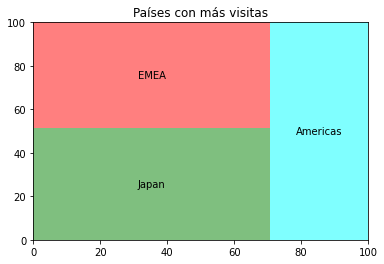

In [15]:
countries = df['Region'].value_counts()
#countries = countries.drop('Unknown')
data = countries.head(3)

visu = squarify.plot(data, label=data.index, alpha=.5, color=['green','red','cyan'])
visu.set_title('Países con más visitas')

#plt.savefig('informe/figures/050-paises_visitas-treemap.png')

Cuantas cuentas fueron creadas por año.

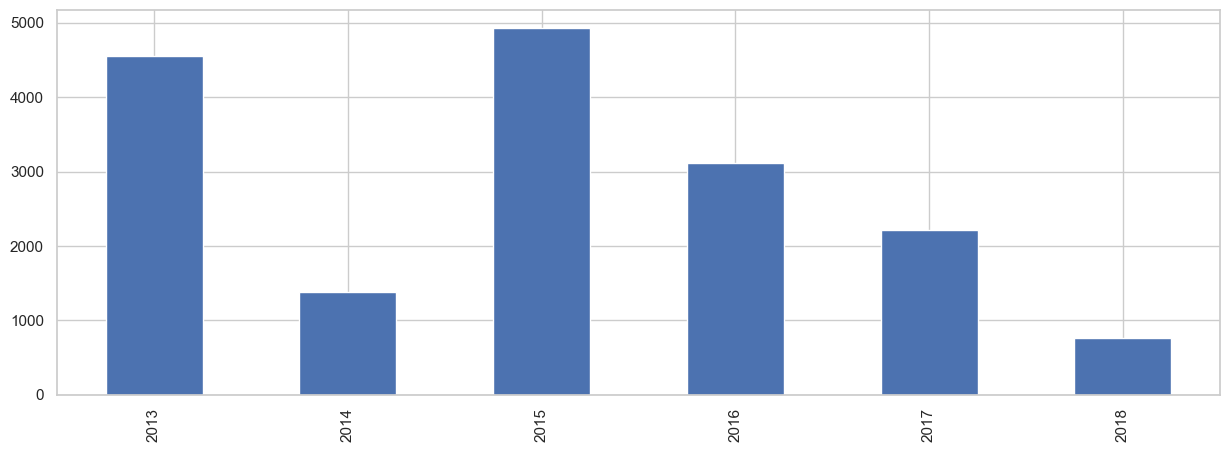

In [27]:
df['Account_Created_Year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))

In [9]:
regiones = df['Region'].value_counts()
regiones

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

Text(0.5, 0, 'Región')

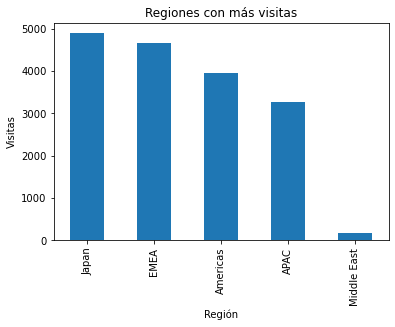

In [12]:
regiones = df['Region']
data = regiones.value_counts()
#data = data.drop('Unknown')

fig = data.head(7).plot(kind='bar')
fig.axes.set_title('Regiones con más visitas')
fig.axes.set_ylabel('Visitas')
fig.axes.set_xlabel('Región')

In [13]:
dom_facturacion = df['Billing_Country'].value_counts()
dom_facturacion

Japan            4879
United States    3802
Germany          1979
Australia        1169
India             672
                 ... 
Colombia            1
Kenya               1
Oman                1
Morocco             1
Ecuador             1
Name: Billing_Country, Length: 80, dtype: int64

In [16]:
terri = df['Territory'].value_counts()
terri

None               4999
Germany            1682
NW America         1568
Australia          1208
India               809
                   ... 
Croatia               1
Czech Republic        1
Solomon Islands       1
Monaco                1
Burma                 1
Name: Territory, Length: 76, dtype: int64

In [16]:
terri.head(20)

None              4999
Germany           1682
NW America        1568
Australia         1208
India              809
NE America         760
Japan              681
Netherlands        533
SE America         493
France             449
Singapore          441
United Kingdom     313
Belgium            285
Italy              283
Spain              268
Central US         254
China (PRC)        218
SW America         206
Thailand           173
Indonesia          154
Name: Territory, dtype: int64

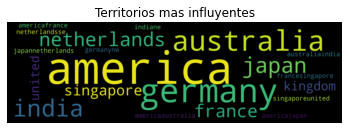

In [44]:
territorios = df['Territory'].replace(to_replace='None', value=np.nan).dropna()
territorios = territorios.apply(lambda x: x.lower())
territorios = territorios.value_counts()
territorios = territorios[territorios >= 300]

text = ''
for w,q in zip(territorios.index,territorios):
    text += ' '.join([w for x in range(q)])

text = ' '.join([s for s in text.split() if len(s)>2])    

wordcloud = WordCloud(width=3000, height=900, margin=0,collocations=False).generate(text)
 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Territorios mas influyentes')
plt.show()

wordcloud.to_image().save('territorios.png')

New:
[]


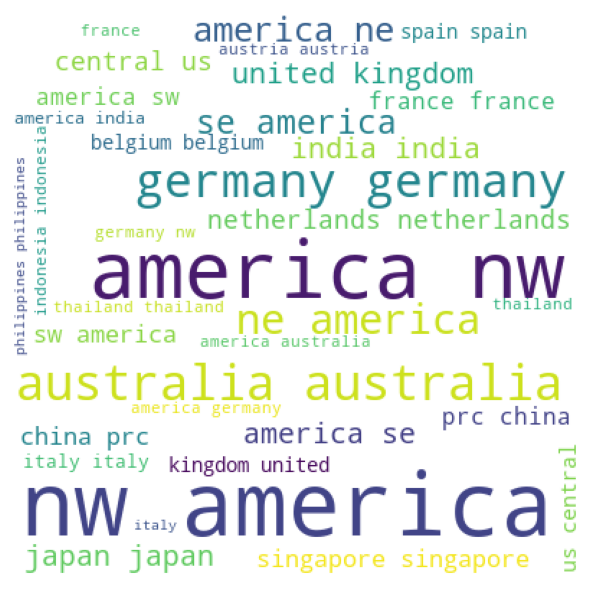

In [17]:
territorios = df['Territory'].replace(to_replace='None', value=np.nan).dropna()
comment_words = '' 
stopwords = set(STOPWORDS) 

words = []

new_words = sorted(set(words), key=lambda x:words.index(x))
print('New:')
print(new_words)
# iterate through the csv file 
for val in territorios: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

#print(comment_words)
#newlist = sorted(set(mylist), key=lambda x:mylist.index(x))
#new_words = sorted(set(comment_words, key=lambda x:comment_words.index(x)))
#print('New:')
#print(new_words)
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [176]:
closes_won = df.loc[(df['Stage'] == 1)]
#closes_won['Territory'].replace(to_replace='None', value='Japan',inplace=True)
closes_won

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Opportunity_ID,Month,Delivery_Quarter,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Year,Month_B
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,1,2016 - 1,Q1,EUR,"48,230.00",EUR,"48,230.00",1,2016,1
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,2,2016 - 1,Q1,USD,"83,865.60",USD,"83,865.60",1,2016,1
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,4/21/2015,...,7,2016 - 1,Q1,USD,"50,688.00",USD,"50,688.00",1,2016,1
23,28524,APAC,India,1,1,1,1,0,Bureaucratic_Code_4,10/13/2015,...,11,2016 - 1,Q1,USD,"1,621,851.00",USD,"1,621,851.00",1,2016,1
63,13392,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,20,2016 - 1,Q1,EUR,"103,350.00",EUR,"103,350.00",1,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16931,17804,EMEA,United Kingdom,1,1,0,0,0,Bureaucratic_Code_4,10/29/2013,...,12794,2016 - 2,Q1,EUR,"2,209,350.00",EUR,"2,209,350.00",1,2016,2
16934,15853,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,12796,2016 - 2,Q1,EUR,"56,160.00",EUR,"112,510.00",1,2016,2
16937,17683,EMEA,Germany,0,0,0,0,0,Bureaucratic_Code_4,7/27/2013,...,12797,2016 - 2,Q1,EUR,"413,400.00",EUR,"528,918.75",1,2016,2
16939,18324,EMEA,Norway,1,1,0,0,0,Bureaucratic_Code_4,7/27/2013,...,12799,2016 - 4,Q2,EUR,"401,700.00",EUR,"401,700.00",1,2016,4


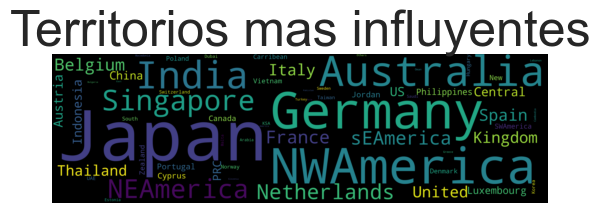

In [182]:
wons = df.loc[(df['Stage'] == 1),'Territory']

#wons.replace(to_replace='None',value=np.nan,inplace=True).dropna()
#new = closes_won.replace(to_replace='None', value=np.nan).dropna()
wons.replace("NW America","NWAmerica",inplace=True)
wons.replace("None","",inplace=True)
wons.replace("NE America", "NEAmerica",inplace=True)
wons.replace("SW America", "SWAmerica",inplace=True)
wons.replace("SE America", "sEAmerica",inplace=True)
#print(new)
#closes_won = closes_won['Territory'].replace(to_replace='None', value=np.nan).dropna()

#new = closes_won.replace("NW America", "NWAmerica")
#display(new)
#new2 = new.replace("NE America", "NEAmerica")
#display(new2)
#closes_won['Territory'].replace("NE America", "NEAmerica",inplace=True)
#closes_won['Territory'].replace("SW America", "SWAmerica",inplace=True)
#closes_won['Territory'].replace("SE America", "SEAmerica",inplace=True)
#new = closes_won['Territory']
#print(new)
#closes_won.head(10)
#closes_won = closes_won.apply(lambda x: x.lower())
#closes_won = closes_won.value_counts()
#closes_won = closes_won[closes_won >= 300]

text = ' '.join(wons)


wordcloud2 = WordCloud(width=3000, height=900, margin=0,collocations=False).generate(text)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Territorios mas influyentes')
plt.show()



